In [ ]:
#Part 1.1

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb
df = pd.read_csv('Manhattan12.csv',skiprows = 4)

In [ ]:
#Show the shape of the dataset

In [454]:
df.shape[0]

27395

In [455]:
df.shape[1]

21

In [ ]:
#Rename incorrectly formatted column names (e.g. SALE\nPRICE)

In [456]:
df.rename(columns={'BOROUGH':'NEIGHBOUR','NEIGHBORHOOD':'NEIGHBOURHOOD','EASE-MENT': 'BASEMENT', 'APART\nMENT\nNUMBER':'APARTMENT NUMBER', 'SALE\nPRICE':'SALE PRICE'}, inplace = True)

In [ ]:
#Create list of categorical variables and another for the numerical variables

In [458]:
numeric_data = ['BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','SALE PRICE']
categorical_data = ['NEIGHBOURHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','ADDRESS','BUILDING CLASS AT TIME OF SALE','SALE DATE']

In [459]:
numeric_data

['BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE']

In [460]:
categorical_data

['NEIGHBOURHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE DATE']

In [ ]:
# For each numerical column, remove the ',' the '$' for the sale price, and then convert them to numeric.

In [461]:
for nd in numeric_data:
    df[nd] = pd.to_numeric(df[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\4003722122.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[nd] = pd.to_numeric(df[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


In [ ]:
# Convert the 'SALE DATE' to datetime.

In [463]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE DATE']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/05/2013' in DD/MM/YYYY format. Provide format or specif

0       2013-05-20
1       2013-05-16
2       2013-05-23
3       2013-05-15
4       2013-05-13
           ...    
27390   2013-04-29
27391   2013-06-26
27392   2013-02-04
27393   2013-06-26
27394   2013-02-04
Name: SALE DATE, Length: 27395, dtype: datetime64[ns]

In [ ]:
# For each categorical variable, remove the spaces, and then replace the empty string '' by NaN.

In [466]:
df[categorical_data] = df[categorical_data].replace(" ", "")
df[categorical_data] = df[categorical_data].replace('', np.nan)

In [ ]:
# Replace the zeros in Prices, Land squares, etc. by NaN

In [467]:
UpdatedNumericData = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
df[UpdatedNumericData] = df[UpdatedNumericData].replace(0, np.nan)

In [ ]:
# Show a summary of all missing values as well as the summary statistics

In [469]:
df.isna().sum()

NEIGHBOUR                             0
NEIGHBOURHOOD                         0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BASEMENT                              0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

In [470]:
df.describe

<bound method NDFrame.describe of        NEIGHBOUR              NEIGHBOURHOOD  \
0              1                              
1              1                              
2              1                              
3              1                              
4              1                              
...          ...                        ...   
27390          1  WASHINGTON HEIGHTS UPPER    
27391          1  WASHINGTON HEIGHTS UPPER    
27392          1  WASHINGTON HEIGHTS UPPER    
27393          1  WASHINGTON HEIGHTS UPPER    
27394          1  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      13  CONDOS - ELEVATOR APARTMENTS                                    
1      13  CONDOS - ELEVATOR APARTMENTS                                    
2      13  CONDOS - ELEVATOR APARTMENTS                                    
3      13  CONDOS - ELEVATOR APARTMENTS                                    
4      13  CONDOS - E

In [ ]:
# Drop the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'

In [471]:
df = df.drop(["NEIGHBOUR", "BASEMENT", "APARTMENT NUMBER"], axis=1)

In [ ]:
# Drop duplicates if any

In [472]:
df = df.drop_duplicates()

In [ ]:
# Drop rows with NaN values

In [473]:
df = df.dropna()

In [ ]:
# Identify and remove outliers if any

In [478]:
q1 = df[NumericalVariable].quantile(0.25)
q3 = df[NumericalVariable].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[~((df[NumericalVariable] < lower_bound) | (df[NumericalVariable] > upper_bound)).any(axis=1)]

In [ ]:
# Identify and remove outliers if any

In [479]:
df.shape

(1580, 18)

In [ ]:
# Consider the log of the prices and normalise the data.

In [480]:
df['LOG SALE PRICE'] = np.log(df['SALE PRICE'])
df[numeric_data] = (df[numeric_data] - df[numeric_data].mean()) / df[numeric_data].std()

C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\682952407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LOG SALE PRICE'] = np.log(df['SALE PRICE'])
C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\682952407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_data] = (df[numeric_data] - df[numeric_data].mean()) / df[numeric_data].std()


In [ ]:
# Visualise the prices over time

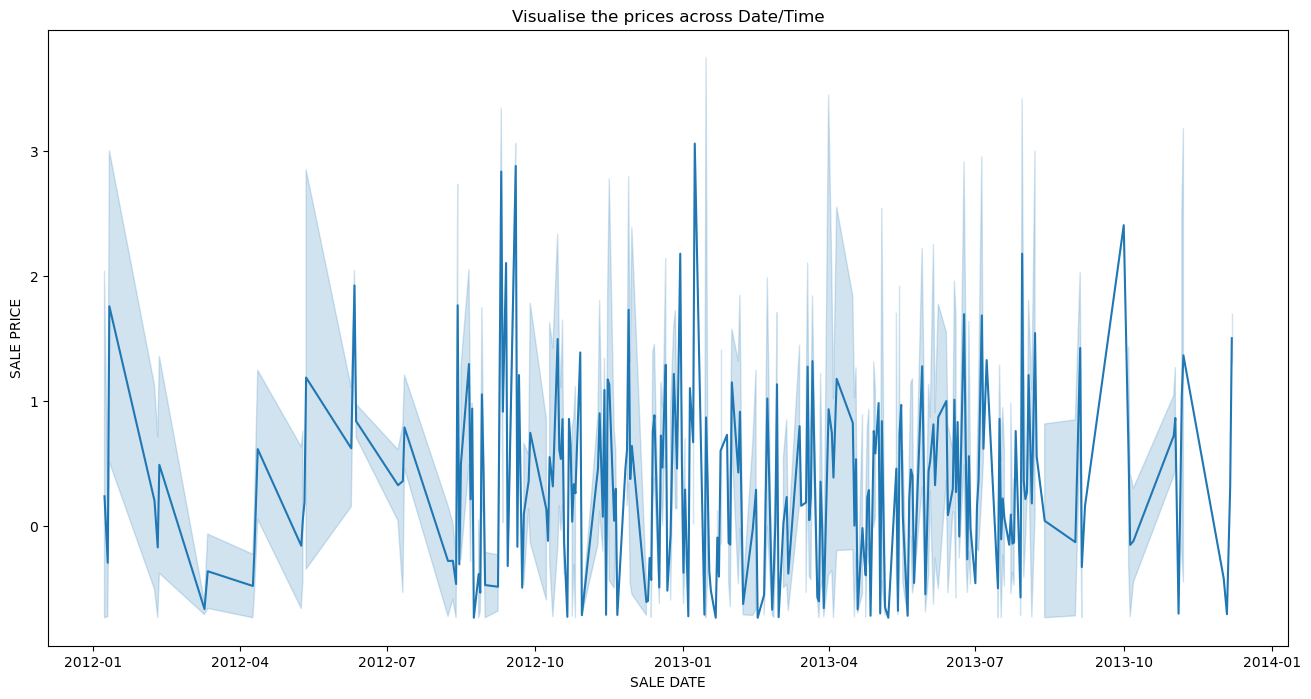

In [491]:
plt.figure(figsize=(16, 8)) 
sb.lineplot(x='SALE DATE', y='SALE PRICE', data=df)
# sb.bar( df['SALE PRICE'],df['SALE DATE'])
plt.title("Visualise the prices across Date/Time")
# plt.xticks(rotation=90)
# plt.xlabel('Sale Price')
# plt.ylabel('SaleDate')
plt.show()

In [ ]:
# Visualise the prices across neighborhood

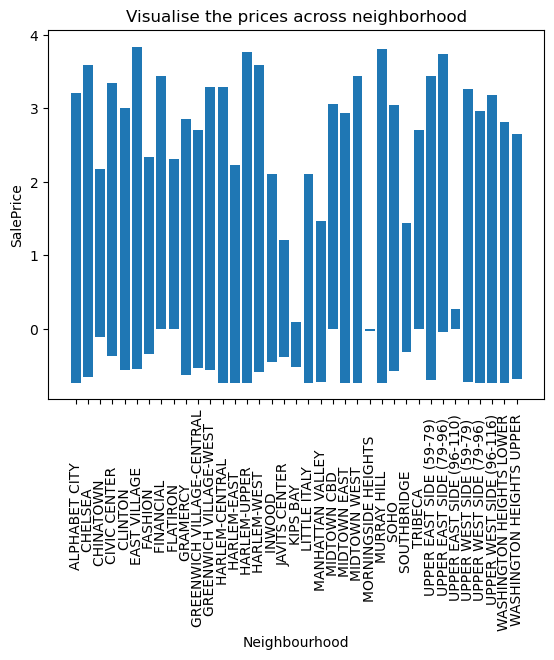

<Figure size 14000x480 with 0 Axes>

In [492]:
plt.bar(df['NEIGHBOURHOOD'],df['SALE PRICE'])
plt.title("Visualise the prices across neighborhood")
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.xlabel('Neighbourhood')
f = plt.figure()
f.set_figwidth(140)
# f.set_figheight(1)
plt.show()

In [ ]:
# Show the scatter matrix plot and the correlation matrix

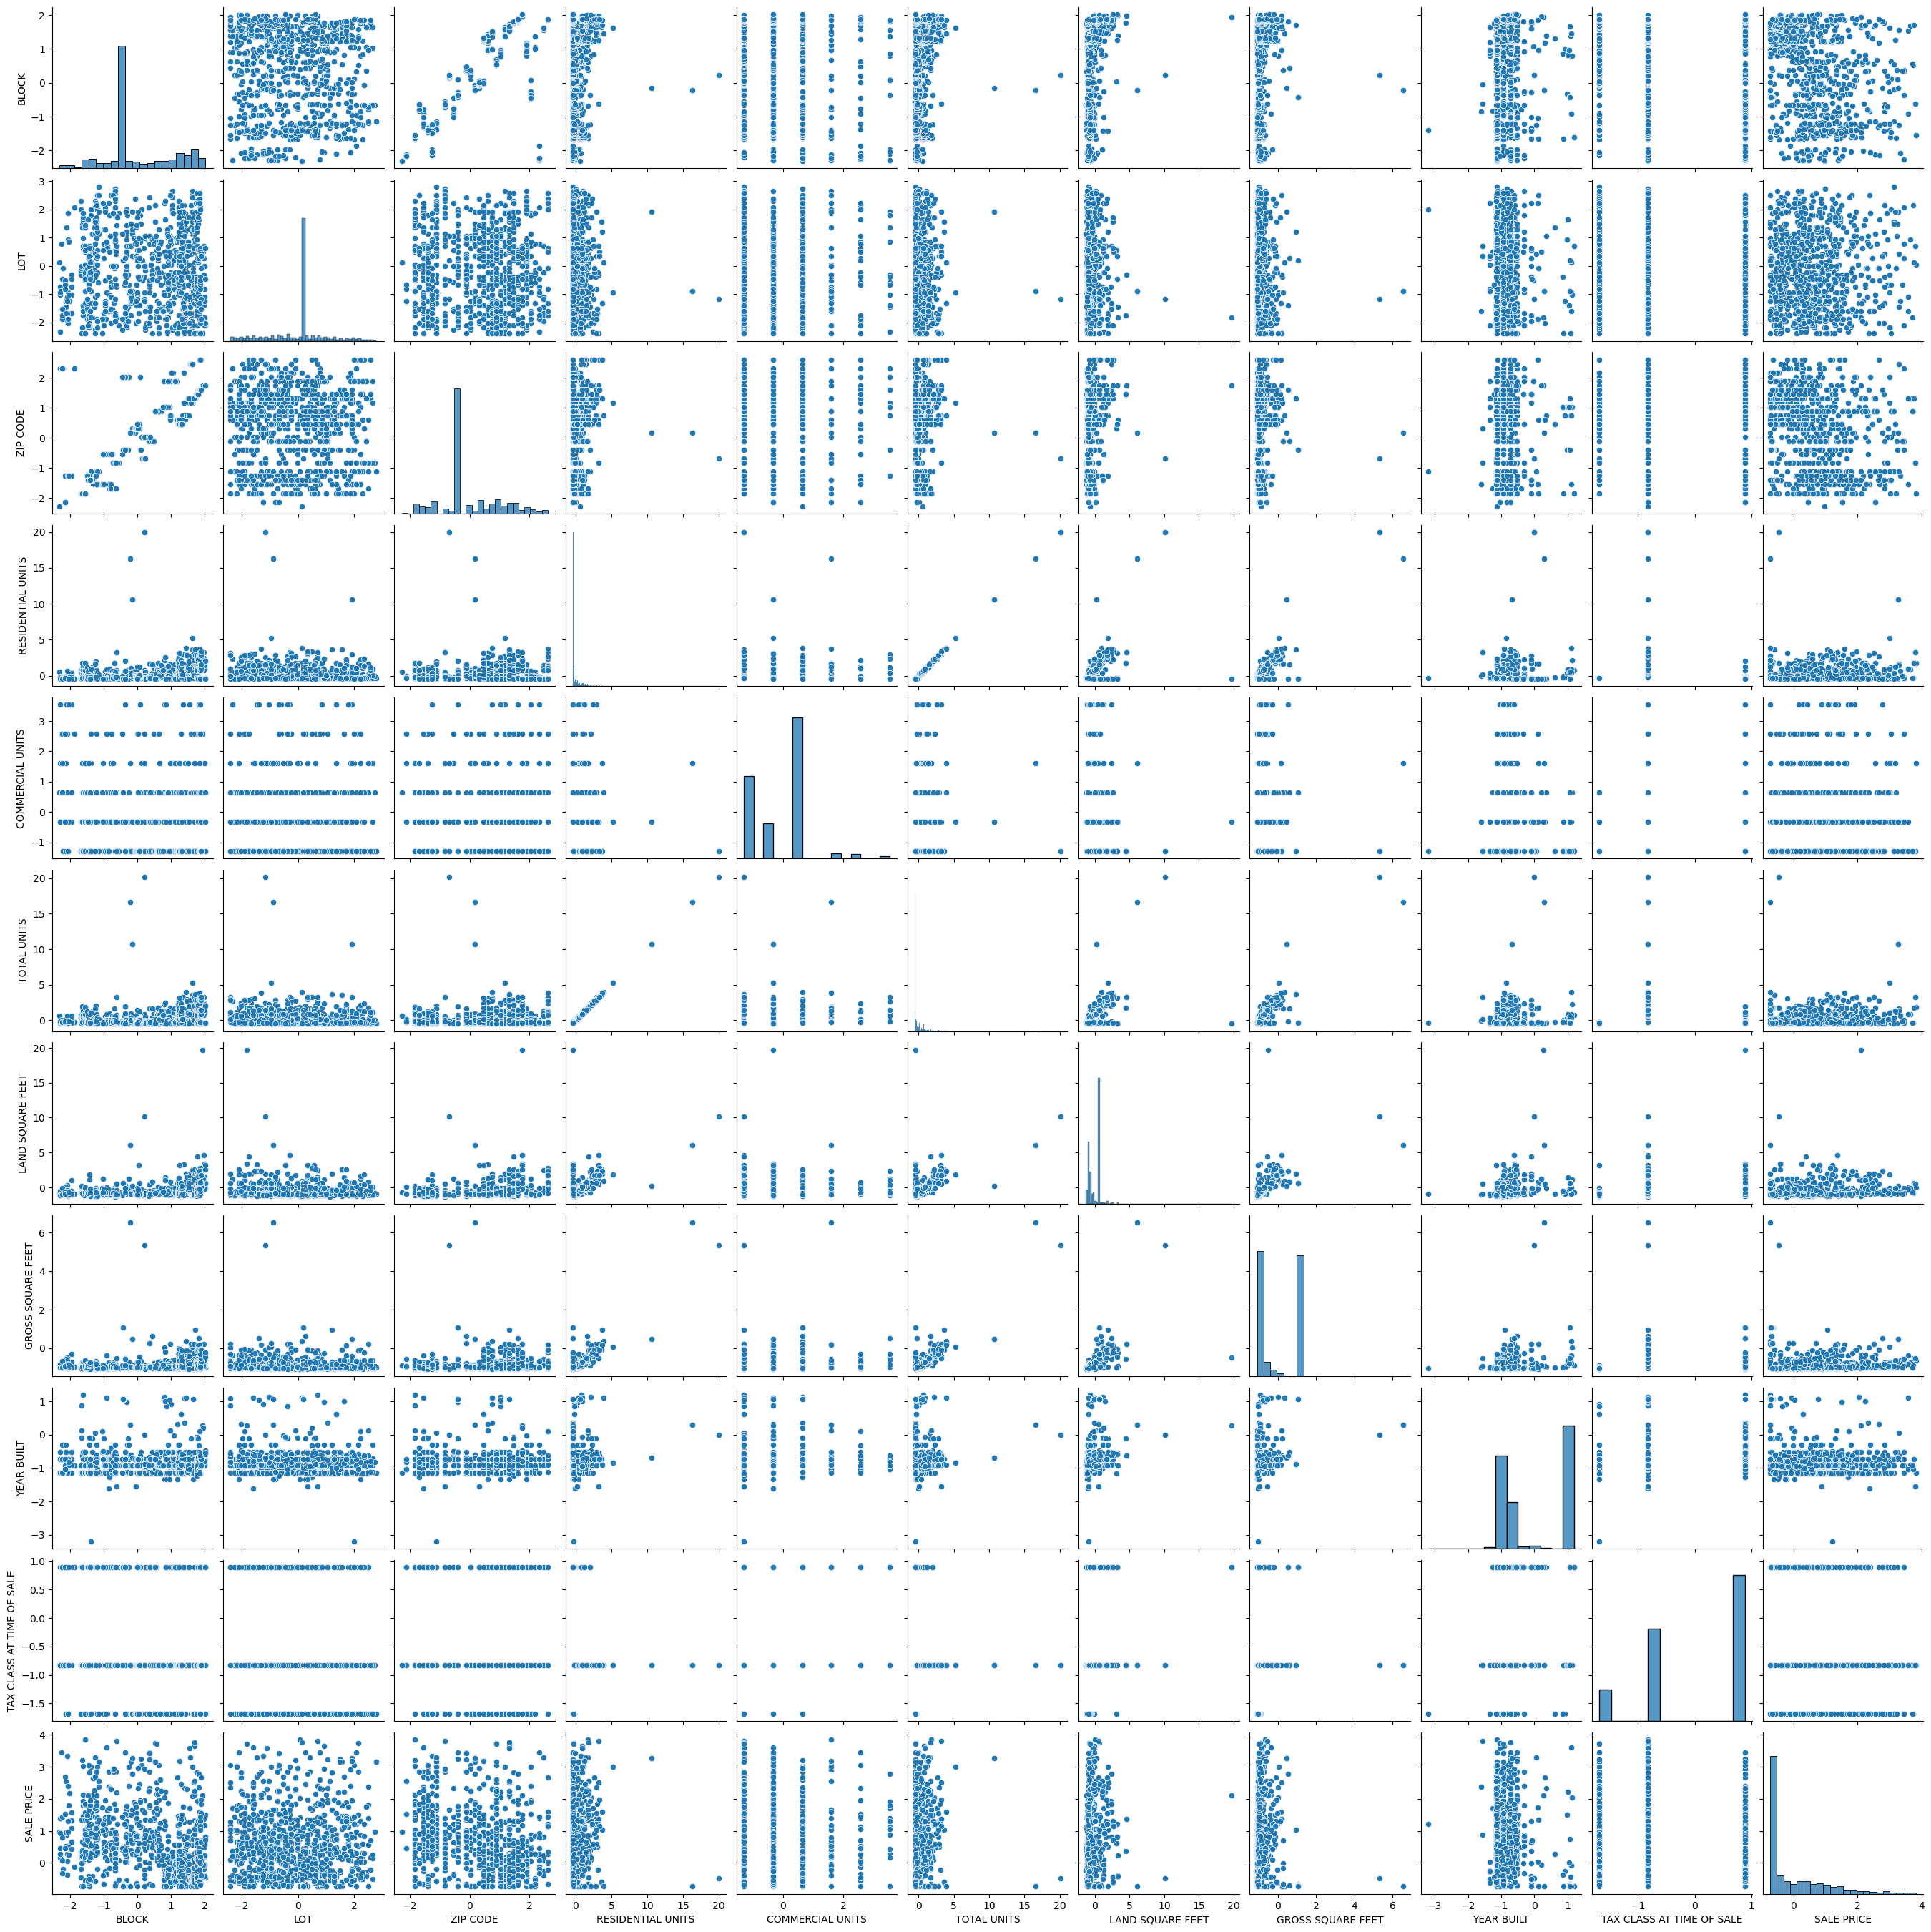

In [493]:
sb.pairplot(df[numeric_data])
plt.show()

In [ ]:
# The correlation matrix

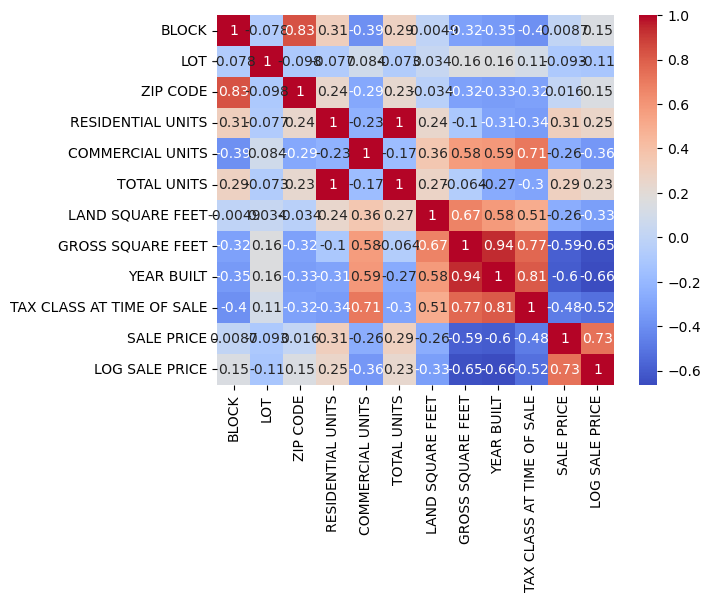

In [494]:
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Any further plots, which demonstrate your understanding of the data

<AxesSubplot:>

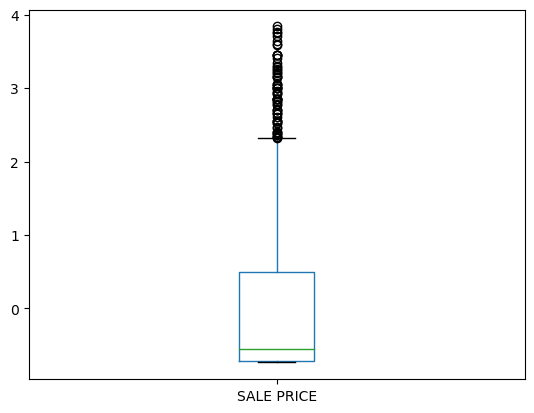

In [495]:
df.boxplot(column =['SALE PRICE'], grid = False)

<AxesSubplot:title={'center':'SALE PRICE'}, xlabel='LOT'>

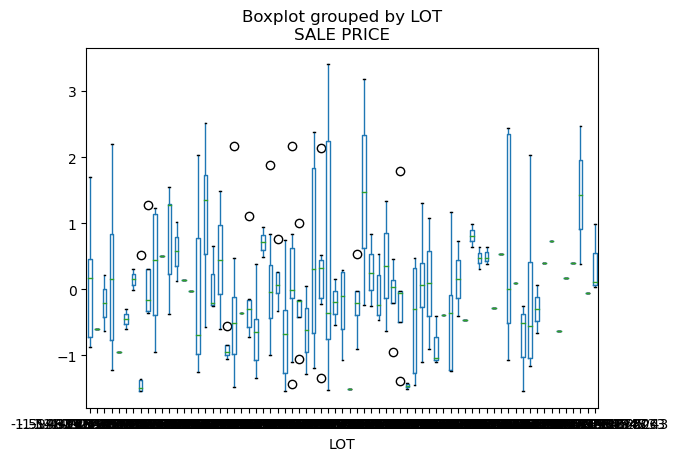

In [431]:
df.boxplot (by='LOT', column=['SALE PRICE'], grid=False)

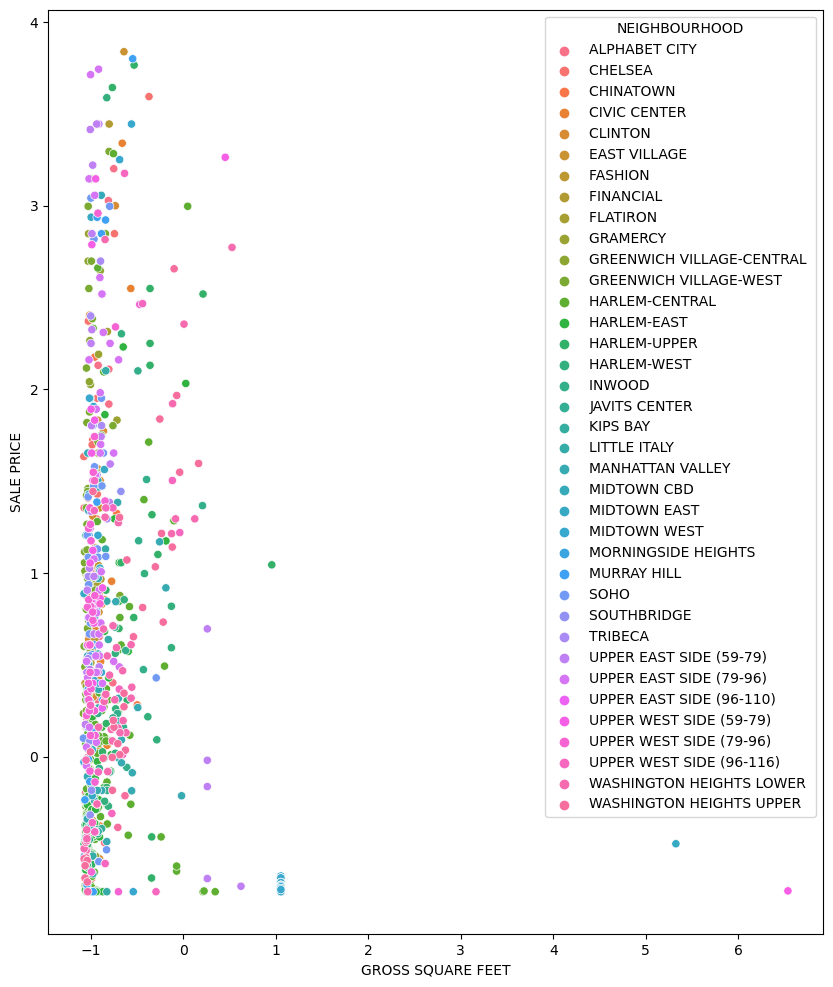

In [499]:
plt.figure(figsize=(10, 12))
sb.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE',hue='NEIGHBOURHOOD', data=df)
plt.show()

<AxesSubplot:ylabel='Frequency'>

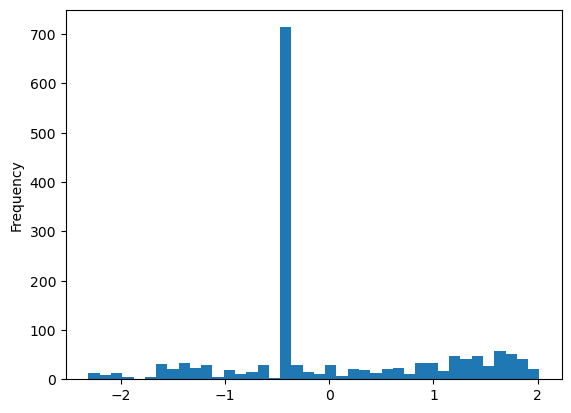

In [501]:
df['BLOCK'].plot.hist(bins=40)

<AxesSubplot:xlabel='TAX CLASS', ylabel='Count'>

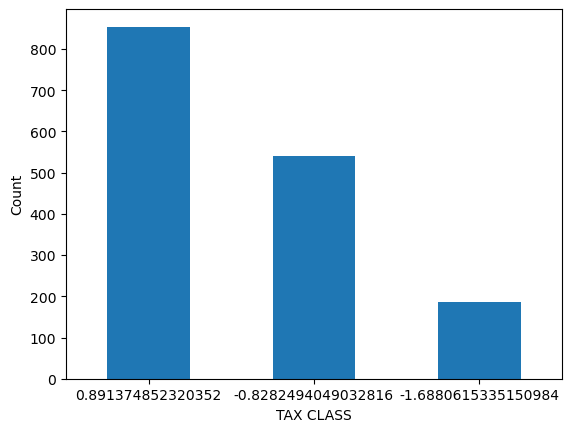

In [502]:
df['TAX CLASS AT TIME OF SALE'].value_counts().plot(kind='bar', xlabel='TAX CLASS', ylabel='Count', rot=0)

In [ ]:
# Top 10 most expensive house in Manhattan and top 10 least expensive house in Manhattan

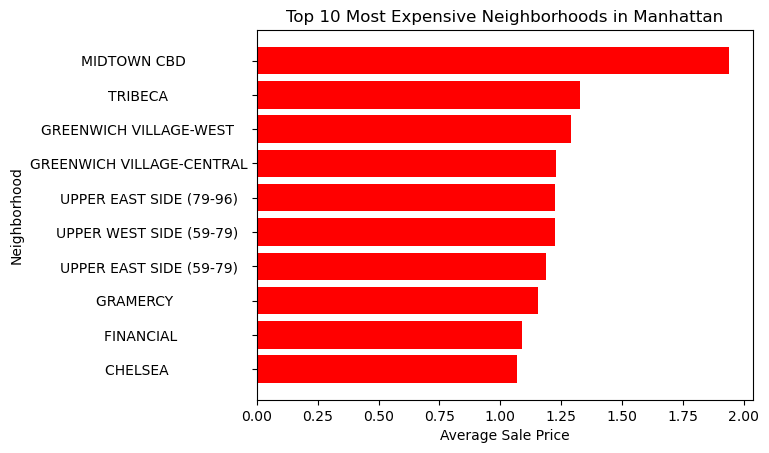

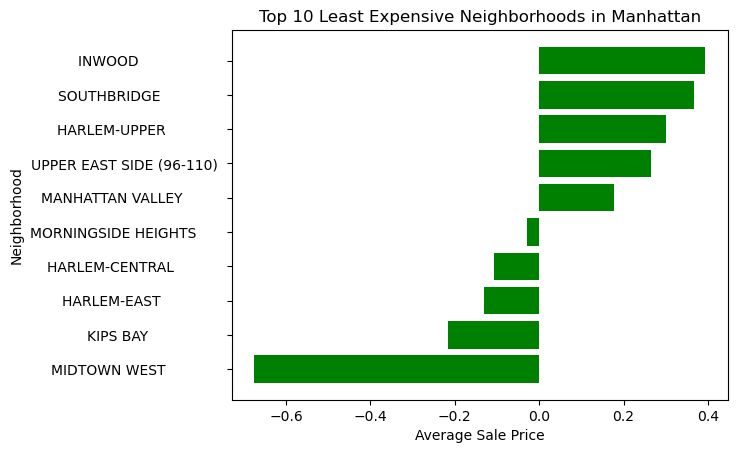

In [507]:
neighbourhood_prices = df.groupby('NEIGHBOURHOOD')['SALE PRICE'].mean()

# Sort the neighbourhoods by average sale price
sorted_neighbourhoods = neighbourhood_prices.sort_values()

# Visualize the 10 most expensive neighbourhoods
most_expensive = sorted_neighbourhoods.tail(10)
plt.barh(most_expensive.index, most_expensive, color='red')
plt.xlabel('Average Sale Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Expensive Neighborhoods in Manhattan')
plt.show()

# Visualize the 10 least expensive neighbourhoods
least_expensive = sorted_neighbourhoods.head(10)
plt.barh(least_expensive.index, least_expensive, color='green')
plt.xlabel('Average Sale Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Least Expensive Neighborhoods in Manhattan')
plt.show()

In [ ]:
# Top 10 most common property types in Manhattan

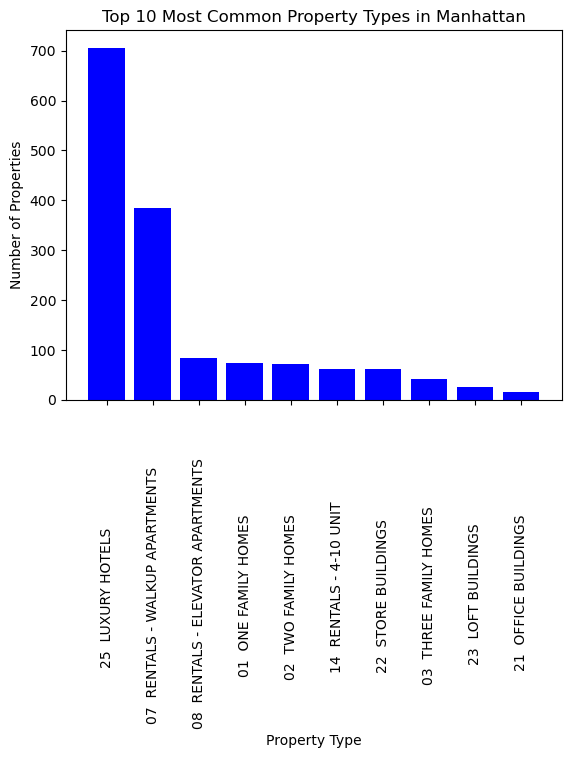

In [509]:
property_counts = df['BUILDING CLASS CATEGORY'].value_counts()

# Sort the property types by count
sorted_properties = property_counts.sort_values(ascending=False)

# Visualize the top 10 property types
top_10 = sorted_properties.head(10)
plt.bar(top_10.index, top_10, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Top 10 Most Common Property Types in Manhattan')
plt.show()

In [ ]:
# Square footage statistics for houses in Manhattan

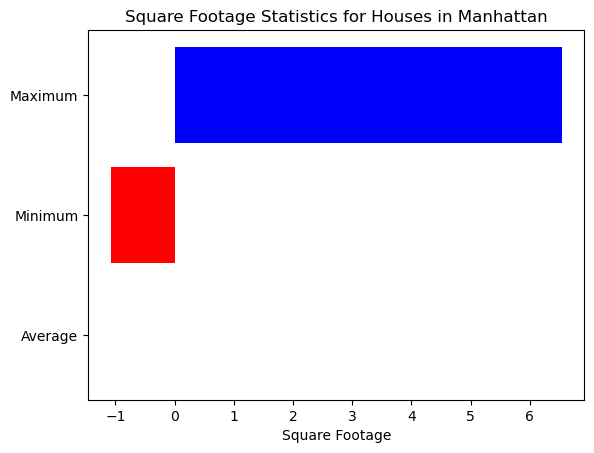

In [512]:
avg_sqft = df['GROSS SQUARE FEET'].mean()
min_sqft = df['GROSS SQUARE FEET'].min()
max_sqft = df['GROSS SQUARE FEET'].max()

# Visualize the square footage statistics
plt.barh(['Average', 'Minimum', 'Maximum'], [avg_sqft, min_sqft, max_sqft], color=['green', 'red', 'blue'])
plt.xlabel('Square Footage')
plt.title('Square Footage Statistics for Houses in Manhattan')
plt.show()

In [ ]:
# Part 1.3.1
# Select the predictors that would have impact in predicting house prices. 
# The following predictor can help in predicting the house prices:
#     LAND SQUARE FEET
#     RESIDENTIAL UNITS
#     TAX CLASS AT TIME OF SALE 
#     TOTAL UNITS
#     BLOCK
#     LOT
#     ZIP CODE
#     GROSS SQUARE FEET
#     COMMERCIAL UNITS
#     YEAR BUILT

C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\204954468.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[nd] = pd.to_numeric(df1[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


Train R-squared: 0.16328905043006847
Test R-squared: -0.1804882081497281
MSE: 0.7408595699181433
Cross-validation scores: [-0.0089862   0.12898092 -0.01304085  0.12541046 -0.13841134]
Mean cross-validation score: 0.018790597437666357


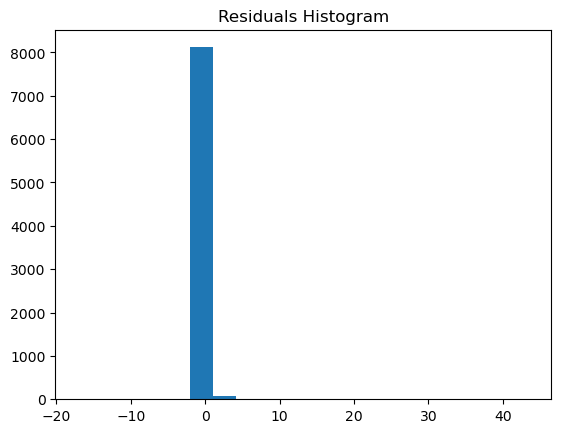

In [504]:
#Part 1.3
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Load your dataset
df1 = pd.read_csv('Manhattan12.csv',skiprows = 4)
# Define predictors and target variable
numeric_data = ['SALE\nPRICE','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE']
for nd in numeric_data:
    df1[nd] = pd.to_numeric(df1[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')

df1[numeric_data] = df1[numeric_data].drop_duplicates()


df1[numeric_data] = df1[numeric_data].replace(0, np.nan)
# imputer = SimpleImputer(missing_values='NAN', strategy='mean')
df1[numeric_data] = df1[numeric_data].fillna(df1[numeric_data].mean())
#normalizing the numerical-data
df1[numeric_data] = (df1[numeric_data] - df1[numeric_data].mean()) / df1[numeric_data].std()

# id1 = imputer.fit_transform(df1)
X = df1[['LAND SQUARE FEET','RESIDENTIAL UNITS','TAX CLASS AT TIME OF SALE', 'TOTAL UNITS','BLOCK','LOT','ZIP CODE','GROSS SQUARE FEET','COMMERCIAL UNITS','YEAR BUILT']]
y = df1['SALE\nPRICE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using R-squared
print('Train R-squared:', model.score(X_train, y_train))
print('Test R-squared:', model.score(X_test, y_test))

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
# print('Shape of DataSet:', df1.shape)
print('MSE:',  mean_squared_error(y_test, model.predict(X_test)))
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', np.mean(cv_scores))

# Plot the residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()

In [ ]:
#Part - 2.1
# Consider the entire datasets given in this assignment. Develop an improved predictive
# model that predicts the sales prices of houses. Make sure to validate your model. You 
# should aim for a model with a higher performance while using a maximum of data 
# points. This implies treating missing values differently for example through imputation
# rather than dropping them.

In [438]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
df2 = pd.read_csv('Manhattan12.csv',skiprows = 4)
numeric_data = ['SALE\nPRICE','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE']
for nd in numeric_data:
    df2[nd] = pd.to_numeric(df2[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')

df2[numeric_data] = df2[numeric_data].drop_duplicates()
df2[numeric_data] = df2[numeric_data].replace(0, np.nan)

# imputer = SimpleImputer(missing_values='NAN', strategy='mean')
df2[numeric_data] = df2[numeric_data].fillna(df2[numeric_data].mean())

#normalizing the numerical-data
df2[numeric_data] = (df2[numeric_data] - df2[numeric_data].mean()) / df2[numeric_data].std()

# Split the data into training and test sets
train_data, test_data = train_test_split(df2[numeric_data], test_size=0.22, random_state=42)

# Separate the target variable
train_labels = train_data['SALE\nPRICE']
test_labels = test_data['SALE\nPRICE']
#As the target variable are stored in train and test labels so we are removing from the parent test data.
# Drop the target variable from the features
train_data.drop('SALE\nPRICE', axis=1, inplace=True)
test_data.drop('SALE\nPRICE', axis=1, inplace=True)

# Impute the missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
train_data = imputer.fit_transform(train_data)
test_data = imputer.transform(test_data)

# Train the model using random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data, train_labels)

print(train_data)
print(train_labels)
# Predict on the test data
predictions = rf.predict(test_data)

# Evaluate the model using root mean squared error
rmse = mean_squared_error(test_labels, predictions, squared=False)
print('Shape of DataSet:', df2.shape)
print('R Score:', rf.score(train_data, train_labels))
print(f"Root Mean Squared Error: {rmse}")

C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\2039801799.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2[nd] = pd.to_numeric(df2[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


[[-1.22289350e+00 -9.31488777e-01 -8.12177535e-01 ... -6.52107287e-13
   4.53487285e-01 -4.21953815e-01]
 [-1.57898630e-13 -6.65463745e-14  2.49079581e-11 ... -6.52107287e-13
   1.17663578e-12 -6.02339639e-14]
 [ 5.41789258e-01 -9.34084555e-01 -2.51460724e-01 ... -6.52107287e-13
  -7.33113730e-01 -4.21953815e-01]
 ...
 [-7.17442651e-01  6.12999558e-01 -5.76086247e-01 ... -6.52107287e-13
   1.17663578e-12 -4.21953815e-01]
 [-1.57898630e-13 -6.65463745e-14  2.49079581e-11 ... -6.52107287e-13
   1.17663578e-12 -6.02339639e-14]
 [ 4.95240792e-02 -8.75679534e-01 -2.21949313e-01 ... -6.52107287e-13
  -1.22753082e+00 -4.21953815e-01]]
4490    -8.436177e-02
6379     3.716441e-14
9366    -1.160031e-01
11766    3.716441e-14
24387    3.716441e-14
             ...     
21575   -1.316702e-01
5390    -6.153815e-02
860     -5.843428e-02
15795    3.716441e-14
23654   -1.467229e-01
Name: SALE\nPRICE, Length: 21368, dtype: float64
Shape of DataSet: (27395, 21)
R Score: 0.8680070888549611
Root Mean Squar

In [ ]:
#Part - 2.2
# Use the K-Means algorithm to cluster your cleansed dataset and compare the obtained 
# clusters with the distribution found in the data. Justify your clustering and visualise 
# your clusters as appropriate.

C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\2033576905.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3[nd] = pd.to_numeric(df3[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


The average silhouette score is:  0.9832483645346444


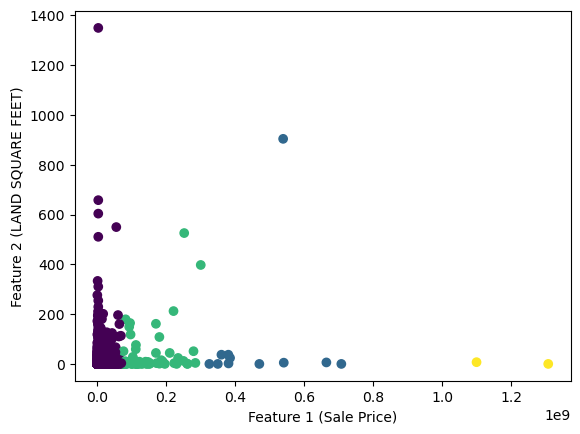

In [439]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
df3 = pd.read_csv('Manhattan12.csv',skiprows = 4)

numeric_data = ['SALE\nPRICE','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE']
for nd in numeric_data:
    df3[nd] = pd.to_numeric(df3[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')

df3[numeric_data] = df3[numeric_data].drop_duplicates()
df3[numeric_data] = df3[numeric_data].replace(0, np.nan)

# imputer = SimpleImputer(missing_values='NAN', strategy='mean')
df3[numeric_data] = df3[numeric_data].fillna(df3[numeric_data].mean())

# Choose the number of clusters
num_clusters = 4

# Initialize the KMeans model
model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data
model.fit(df3[numeric_data])

# Predict the clusters for the data
clusters = model.predict(df3[numeric_data])

# Calculate the silhouette score
silhouette_avg = silhouette_score(df3[numeric_data], clusters)

# Print the silhouette score
print("The average silhouette score is: ", silhouette_avg)

# Visualize the clusters using a scatter plot
plt.scatter(df3[numeric_data].iloc[:, 0], df3[numeric_data].iloc[:, 6], c=clusters, cmap='viridis')
plt.xlabel('Feature 1 (Sale Price)')
plt.ylabel('Feature 2 (LAND SQUARE FEET)')
plt.show()

In [ ]:
#Part - 2.3
# Build up local regressors based on your clustering and discuss how this clusters-based 
# regression compares to your regression model obtained in Part 2. 1.

In [262]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the CSV dataset
df4 = pd.read_csv('Manhattan12.csv',skiprows = 4)

numeric_data = ['SALE\nPRICE','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE']
for nd in numeric_data:
    df4[nd] = pd.to_numeric(df4[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')

df4[numeric_data] = df4[numeric_data].drop_duplicates()
df4[numeric_data] = df4[numeric_data].replace(0, np.nan)

# imputer = SimpleImputer(missing_values='NAN', strategy='mean')
df4[numeric_data] = df4[numeric_data].fillna(df4[numeric_data].mean())

# Split the dataset into features and target
X = df4[numeric_data].drop('SALE\nPRICE', axis=1)
y = df4[numeric_data]['SALE\nPRICE']

# Cluster the data
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(X)

# Build local regressors
regressors = []
for i in range(n_clusters):
    cluster_X = X[clusters == i]
    cluster_y = y[clusters == i]
    lr = LinearRegression()
    lr.fit(cluster_X, cluster_y)
    regressors.append(lr)

# Predict using local regressors
y_pred = np.zeros_like(y)
for i, lr in enumerate(regressors):
    mask = (clusters == i)
    y_pred[mask] = lr.predict(X[mask])

# Compute R-squared score
r2 = r2_score(y, y_pred)
print(f"R-squared score: {r2:.4f}")

C:\Users\Sauravk\AppData\Local\Temp\ipykernel_11712\1846265990.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4[nd] = pd.to_numeric(df4[nd].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')


R-squared score: 0.2840
